# 📊 Caso de Negocio: Campaña de Marketing Bancario

## 🌐 Contexto del Problema

**Finanzas Global** es un banco importante de Latinoamérica que ha implementado una campaña de **marketing directo** para ofrecer **depósitos a plazo fijo** a sus clientes. El equipo directivo está preocupado porque, a pesar de contar con datos detallados sobre los clientes (como edad, ocupación, nivel educativo, etc.), no han logrado **predecir con precisión** quiénes aceptarán la oferta. La baja tasa de éxito de la campaña está impactando negativamente en los resultados, lo que ha generado la necesidad de un enfoque más efectivo.

El equipo desea entender cómo variables como el **tipo de trabajo**, los **ingresos**, y el **historial bancario** afectan la decisión de los clientes. El objetivo es identificar a los clientes más propensos a aceptar la oferta y, de esta forma, **optimizar la campaña de marketing** para mejorar la tasa de conversión.

## 🧐 Tu Rol: Análisis del Rendimiento

Como parte del **equipo de analistas de datos** de Finanzas Global, se te ha asignado la tarea de:

1. 🧩 **Analizar los factores** que están influyendo en la decisión de los clientes.
2. 🔍 Utilizar modelos de **clasificación** para predecir qué clientes aceptarán la oferta de depósitos a plazo fijo.
3. 💡 Proporcionar **recomendaciones basadas en datos** para mejorar la efectividad de las campañas futuras.

Para realizar este análisis, utilizarás la base de datos `bank-additional-full`, que contiene información relevante sobre los clientes. La base con la que trabajaremos en este ejercicio práctico contiene información bancaria de clientes y de campañas de marketing de un banco de Portugal. Las campañas realizadas se basaron en su mayoría en llamadas telefónicas directas, ofreciendo al cliente del banco realizar un depósito a plazo. Si después de todos los esfuerzos de marketing, el cliente ha accedido a realizar el depósito: la variable de destino fue marcada como 'sí'; de lo contrario, 'no'.

La información disponible incluye:
- **Edad**
- **Tipo de trabajo**
- **Estado civil**
- **Educación**
- **Si el cliente entró en no pago o tiene un crédito en default**
- **Vivienda propia**
- **Si el cliente posee un préstamo**, entre otras

La meta es ayudar a la dirección del banco a **maximizar la tasa de conversión**, mejorando la eficiencia y efectividad de las estrategias de marketing.

## 📊 Modelos de Clasificación a Utilizar
Durante esta semana, se aplicarán **tres modelos de clasificación** para abordar el problema de predicción:

1. **Regresión Logística**: Un modelo simple y eficiente para predecir la probabilidad de aceptar la oferta.
2. **SVM (Support Vector Machine)**: Un modelo que maximiza el margen de separación entre clientes que aceptarán y los que no.
3. **KNN (K-Nearest Neighbors)**: Un enfoque basado en la similitud de los clientes con otros que han aceptado o rechazado la oferta.

Cada modelo será evaluado según su **precisión** y capacidad para identificar a los clientes más propensos a aceptar los depósitos. La comparación de resultados permitirá seleccionar el mejor modelo para la campaña.

## 📝 Conclusión
Este análisis proporcionará una comprensión profunda de cómo los diferentes **factores del perfil de los clientes** afectan la aceptación de la oferta. Con esta información, Finanzas Global podrá **optimizar sus esfuerzos de marketing**, dirigiendo los recursos hacia los segmentos con mayor probabilidad de respuesta positiva, mejorando así la **eficiencia y el rendimiento** de sus campañas. Los resultados de este trabajo grupal permitirán proponer estrategias más acertadas para futuras campañas de marketing.

El equipo tiene la libertad de elegir la opción de análisis que prefiera, trabajando de manera colaborativa para alcanzar el mejor resultado posible.


**Variables de la base de datos **

        1: "Age: Edad del cliente."
        2: "Job: Tipo de trabajo del cliente."
        3: "Marital: Estado civil del cliente."
        4: "Education: Educación del cliente."
        5: "Default: El cliente ha estado en mora o incumplido sus obligaciones."
        6: "Housing: El cliente tiene un préstamo de vivienda."
        7: "Loan: El cliente tiene un préstamo personal."
        8: "Contact: Tipo de comunicación del contacto."
        9: "Month: Último mes del año de contacto."
        10: "day_of_week: último día de contacto de la semana.",
        11: "duration: Duración del último contacto en segundos."
        12: "Pdays: Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérico; 999 significa que el cliente no fue contactado previamente).",
        13: "Previous: **Número de contactos realizados antes de esa campaña**."
        14: "Poutcome: Resultado de la campaña de marketing anterior."
        15: "Emp.var.rate: Tasa de variación del empleo - indicador trimestral."
        16: "Cons.price.idx: Índice de precios al consumidor - indicador mensual."
        17: "Cons.conf.idx: Índice de confianza del consumidor - indicador mensual."
        18: "Euribor3m: Tipo de cambio euribor a 3 meses - indicador diario."
        19: "Nr.employed: Número de empleados - indicador trimestral."
        20: y: depósito a plazo

Importar los módulos requeridos

In [111]:
import numpy as np
import pandas as pd

import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
import warnings
warnings.filterwarnings("ignore")

## 1. Importar una base al Jupyter Notebook con pandas

In [112]:
#Se da permiso a Google Drive para tener acceso a la base de datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
#Importamos la base de datos, subida en google drive, según la ruta, con el nombre df
filename='/content/drive/MyDrive/UDLA-Analitica predictiva/2024 Reconstruccion/Notebooks/udla-aanlitica-pred-2024/S3_Clasificacion/2.Postsesion/bank-additional-full.csv'
#Lee el archivo CSV
df=pd.read_csv(filename, sep=';' )
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# OPCIÓN 1: LOW-CODE

## 2. Descriptivos

In [114]:
# Mostrar las primeras filas del DataFrame
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [115]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [116]:
# Descripción estadística de las variables numéricas
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [117]:
#identifica variables numericas y categoricas

numeric_vars = df.select_dtypes(include=['number']).columns
categorical_vars = df.select_dtypes(include=['object']).columns

print("Variables numéricas:", numeric_vars)
print("Variables categóricas:", categorical_vars)

Variables numéricas: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Variables categóricas: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [118]:
#Estadística descriptiva para variables categóricas
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [119]:
#Resumen de variables categóricas
categoricas = [col for col in df.columns if df[col].dtype == 'object']

for var in categoricas:
    categorias_unicas = df[var].unique()
    valores_categorias = df[var].value_counts()
    categorias_dict = {cat: valores_categorias[cat] for cat in categorias_unicas}
    print(f'{var}: {categorias_dict}')

job: {'housemaid': 1060, 'services': 3969, 'admin.': 10422, 'blue-collar': 9254, 'technician': 6743, 'retired': 1720, 'management': 2924, 'unemployed': 1014, 'self-employed': 1421, 'unknown': 330, 'entrepreneur': 1456, 'student': 875}
marital: {'married': 24928, 'single': 11568, 'divorced': 4612, 'unknown': 80}
education: {'basic.4y': 4176, 'high.school': 9515, 'basic.6y': 2292, 'basic.9y': 6045, 'professional.course': 5243, 'unknown': 1731, 'university.degree': 12168, 'illiterate': 18}
default: {'no': 32588, 'unknown': 8597, 'yes': 3}
housing: {'no': 18622, 'yes': 21576, 'unknown': 990}
loan: {'no': 33950, 'yes': 6248, 'unknown': 990}
contact: {'telephone': 15044, 'cellular': 26144}
month: {'may': 13769, 'jun': 5318, 'jul': 7174, 'aug': 6178, 'oct': 718, 'nov': 4101, 'dec': 182, 'mar': 546, 'apr': 2632, 'sep': 570}
day_of_week: {'mon': 8514, 'tue': 8090, 'wed': 8134, 'thu': 8623, 'fri': 7827}
poutcome: {'nonexistent': 35563, 'failure': 4252, 'success': 1373}
y: {'no': 36548, 'yes': 46

In [120]:
#% de personas que adquirieron el producto luego de la campaña
pd.DataFrame(df.y.value_counts(normalize=True).round(2))

,proportion
y,
no,0.89
yes,0.11


In [121]:
#Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior
#numérico; 999 significa que el cliente no fue contactado previamente)
pd.DataFrame(df.pdays.value_counts(normalize=True).round(2))

,proportion
pdays,
999,0.96
3,0.01
6,0.01
4,0.00
9,0.00
2,0.00
7,0.00
12,0.00
10,0.00


In [122]:
# Corrección del '999'
df.pdays = np.where(df.pdays == 999, 0, df.pdays)

## 3. Identificación de Datos Perdidos

In [123]:
#evalua si la base tiene datos perdidos
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [124]:
#Resumen de variables categóricas con categorias "perdidas"
categoricas = [col for col in df.columns if df[col].dtype == 'object']

for var in categoricas:
    categorias_unicas = df[var].unique()
    valores_categorias = df[var].value_counts()
    categorias_dict = {cat: valores_categorias[cat] for cat in categorias_unicas}
    print(f'{var}: {categorias_dict}')

job: {'housemaid': 1060, 'services': 3969, 'admin.': 10422, 'blue-collar': 9254, 'technician': 6743, 'retired': 1720, 'management': 2924, 'unemployed': 1014, 'self-employed': 1421, 'unknown': 330, 'entrepreneur': 1456, 'student': 875}
marital: {'married': 24928, 'single': 11568, 'divorced': 4612, 'unknown': 80}
education: {'basic.4y': 4176, 'high.school': 9515, 'basic.6y': 2292, 'basic.9y': 6045, 'professional.course': 5243, 'unknown': 1731, 'university.degree': 12168, 'illiterate': 18}
default: {'no': 32588, 'unknown': 8597, 'yes': 3}
housing: {'no': 18622, 'yes': 21576, 'unknown': 990}
loan: {'no': 33950, 'yes': 6248, 'unknown': 990}
contact: {'telephone': 15044, 'cellular': 26144}
month: {'may': 13769, 'jun': 5318, 'jul': 7174, 'aug': 6178, 'oct': 718, 'nov': 4101, 'dec': 182, 'mar': 546, 'apr': 2632, 'sep': 570}
day_of_week: {'mon': 8514, 'tue': 8090, 'wed': 8134, 'thu': 8623, 'fri': 7827}
poutcome: {'nonexistent': 35563, 'failure': 4252, 'success': 1373}
y: {'no': 36548, 'yes': 46

In [125]:
# Sumar los valores "unknown" de cada una de la variables de la base de datos
unknown_count = (df == "unknown").sum()

# Ordenar los resultados
unknown_count_sorted = unknown_count.sort_values(ascending=False)

# Muestra valores calculados
print(unknown_count_sorted)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64


## 4. Evaluación de Datos Atípicos (Outliers)

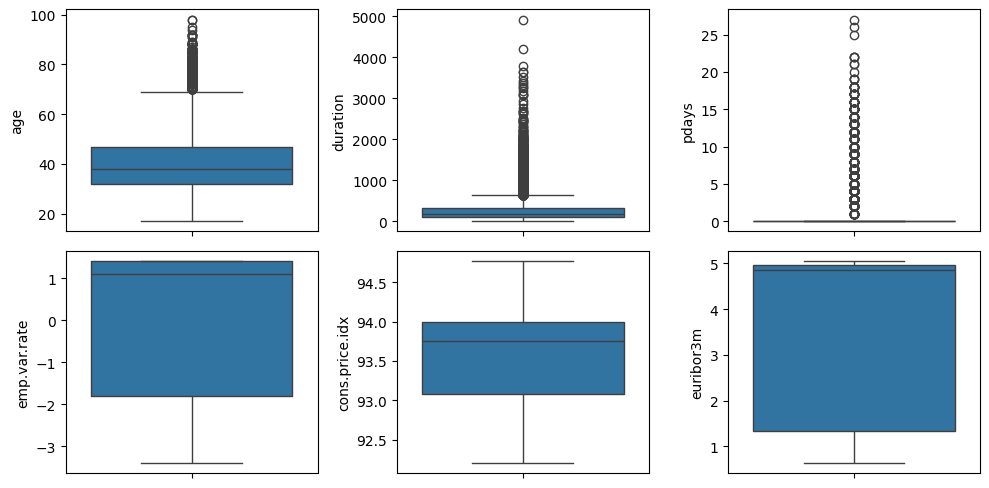

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
# Box plots
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['age'], ax = axs[0,0])
plt2 = sns.boxplot(df['duration'], ax = axs[0,1])
plt3 = sns.boxplot(df['pdays'], ax = axs[0,2])
plt1 = sns.boxplot(df['emp.var.rate'], ax = axs[1,0])
plt2 = sns.boxplot(df['cons.price.idx'], ax = axs[1,1])
plt3 = sns.boxplot(df['euribor3m'], ax = axs[1,2])
plt.tight_layout()

In [127]:
# Identificación de valores atípicos (outliers)
valores_atipicos = {}

variables_numericas = df.select_dtypes(include=['number']).columns

for columna in variables_numericas:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    valores_atipicos[columna] = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)][columna].count()
print("Valores Atípicos:\n", valores_atipicos)


Valores Atípicos:
 {'age': 469, 'duration': 2963, 'campaign': 2406, 'pdays': 1500, 'previous': 5625, 'emp.var.rate': 0, 'cons.price.idx': 0, 'cons.conf.idx': 447, 'euribor3m': 0, 'nr.employed': 0}


## 5.Corrección de Datos Perdidos y Atípicos

In [128]:
# Imputar valores perdidos con la mediana
for columna in variables_numericas:
    valor_mediana = df[columna].median()
    df[columna].fillna(valor_mediana, inplace=True)

# Aplicar winsorización para tratar los valores atípicos (outliers)
from scipy.stats.mstats import winsorize

df['age'] = winsorize(df['age'], limits=[0.05, 0.05])
df['duration'] = winsorize(df['duration'], limits=[0.05, 0.05])
df['campaign'] = winsorize(df['campaign'], limits=[0.05, 0.05])
df['pdays'] = winsorize(df['pdays'], limits=[0.05, 0.05])
df['previous'] = winsorize(df['previous'], limits=[0.05, 0.05])
df['cons.conf.idx'] = winsorize(df['cons.conf.idx'], limits=[0.05, 0.05])


# Verificar nuevamente los datos perdidos y valores atípicos
datos_perdidos_despues = df.isnull().sum()
valores_atipicos_despues = {}
for columna in variables_numericas:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    valores_atipicos_despues[columna] = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)][columna].count()

print("Datos Perdidos Después de la Corrección:\n", datos_perdidos_despues)
print("Valores Atípicos Después de la Corrección:\n", valores_atipicos_despues)

Datos Perdidos Después de la Corrección:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Valores Atípicos Después de la Corrección:
 {'age': 0, 'duration': 2963, 'campaign': 2406, 'pdays': 0, 'previous': 5625, 'emp.var.rate': 0, 'cons.price.idx': 0, 'cons.conf.idx': 0, 'euribor3m': 0, 'nr.employed': 0}


❓¿Porqué cree que no se elimaron todos los outliers?

## 6.Visualización de Distribuciones

---

In [129]:
df.groupby('y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


In [130]:
#Selección de variables cualitativas y cuantitativas
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

''

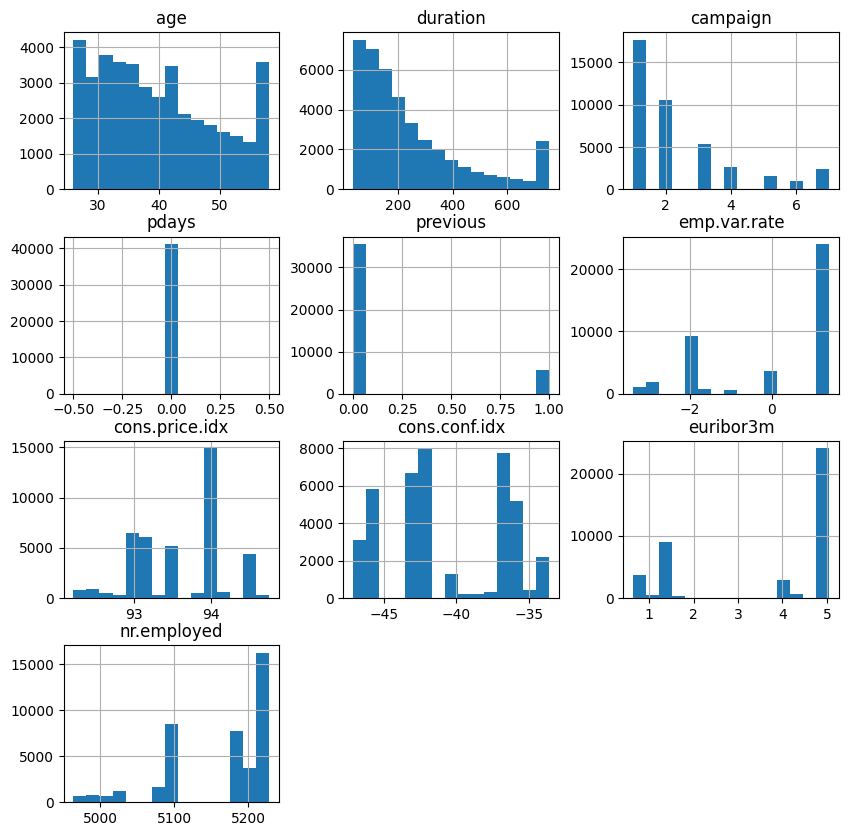

In [131]:
#Analizamos la concentración de datos en los histográmas de cada una de las variables cuantitatiivas
df[var_cuantitativas].hist(bins = 15, figsize = (10,10))
;

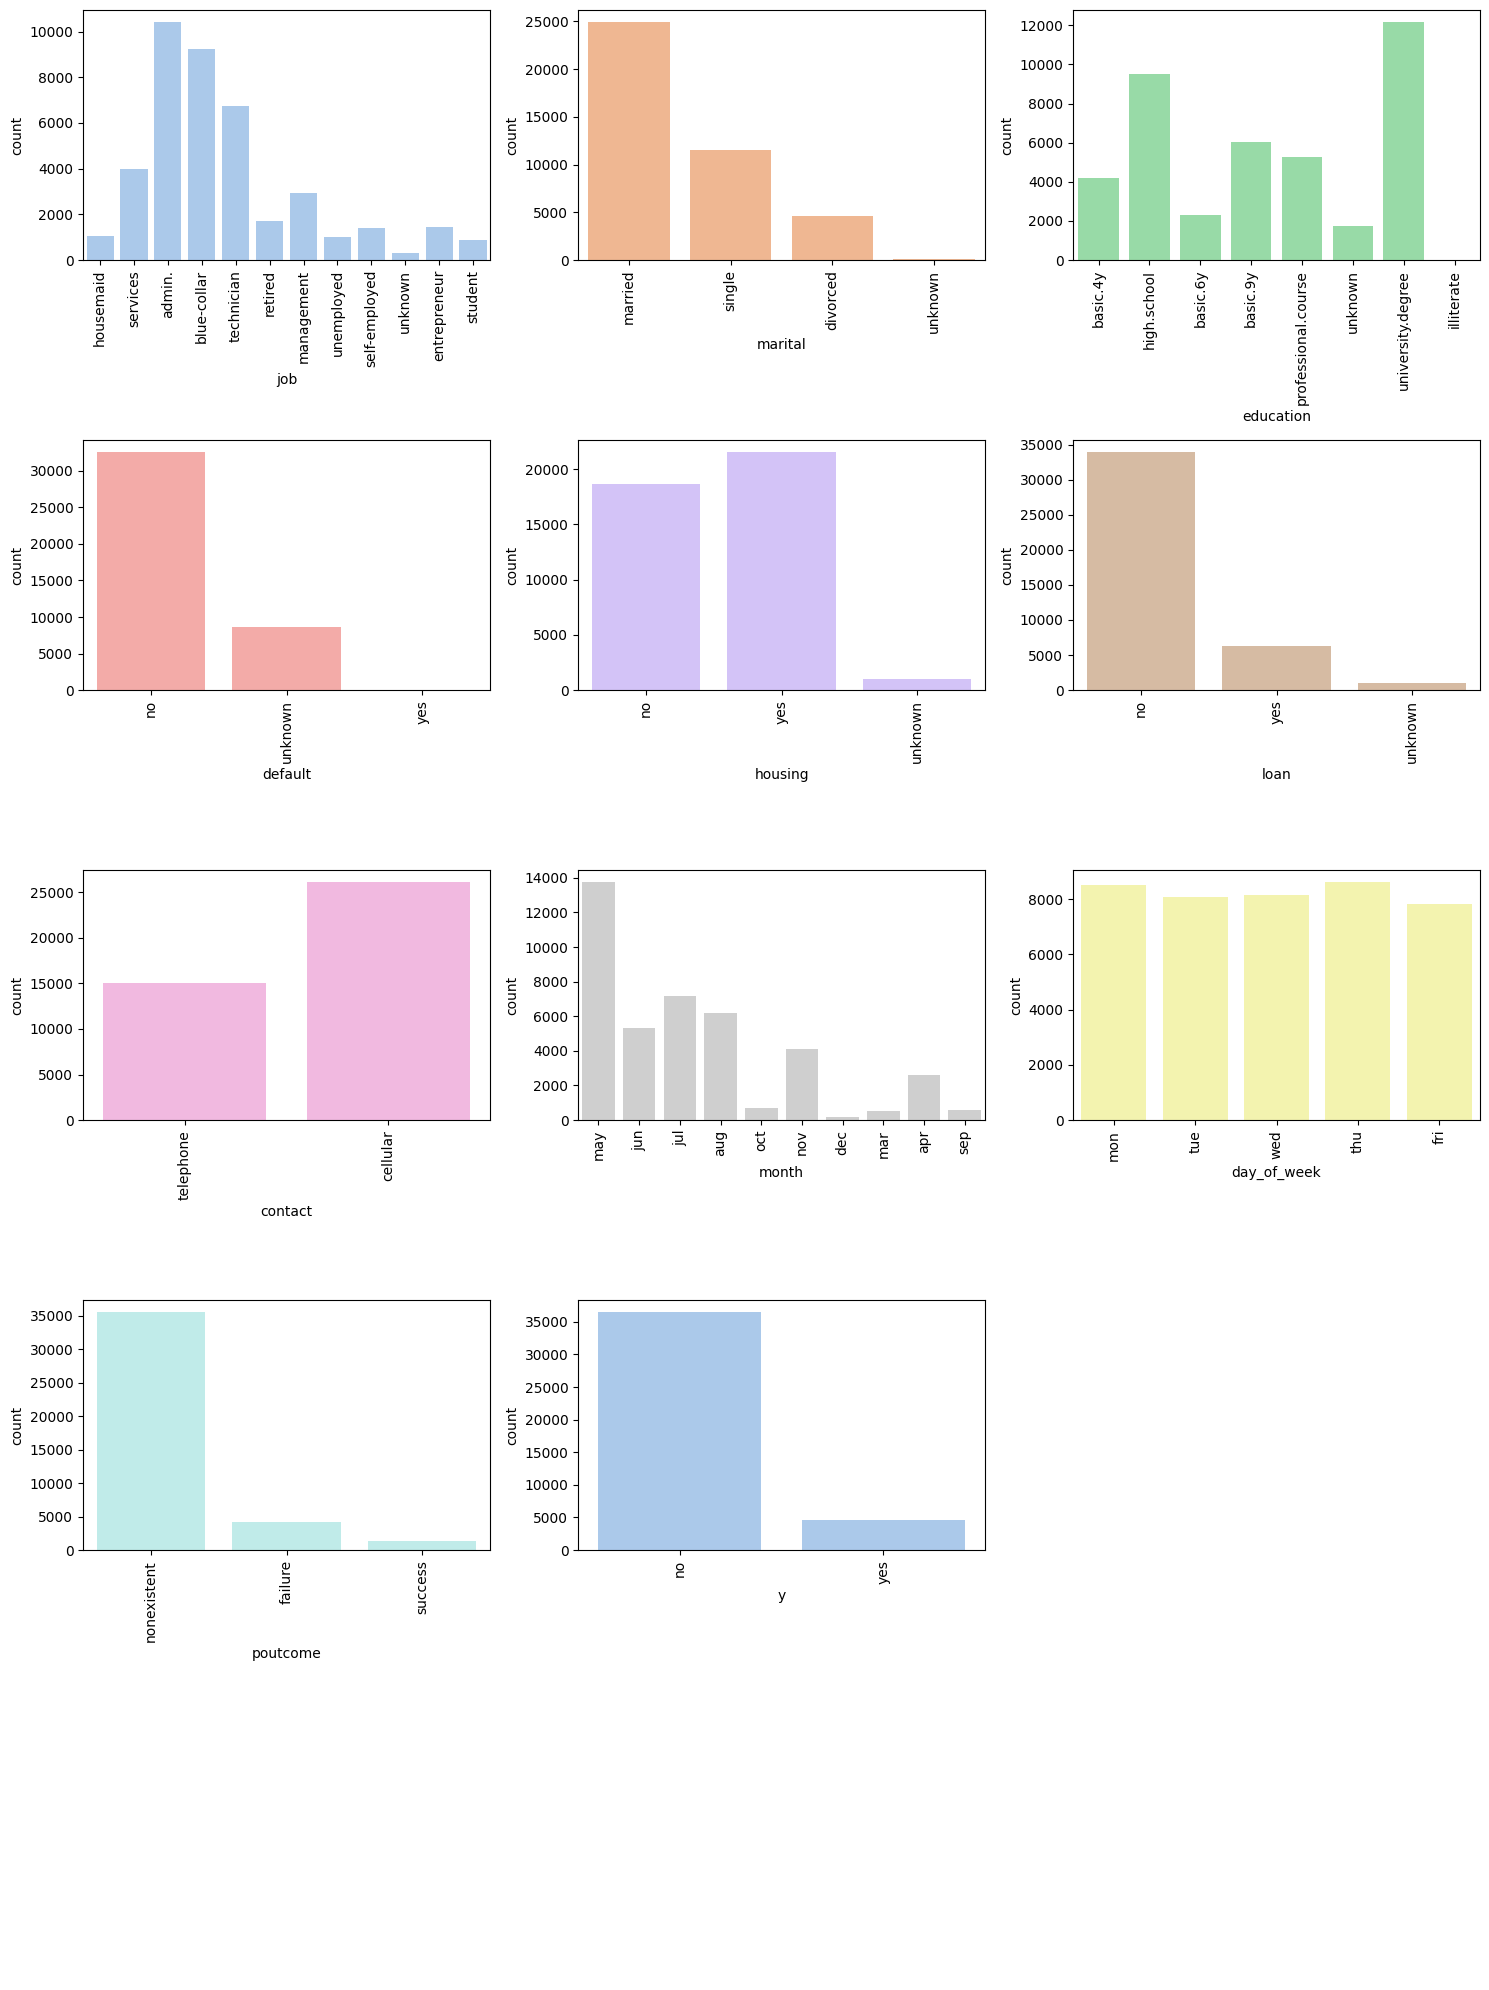

In [132]:
if len(var_cualitativas) != 11:
    raise ValueError("El número de variables cualitativas no coincide con el número de subgráficos")

# For plotting multiple category columns at once
fig, ax = plt.subplots(5, 3, figsize=(15, 20))  # 5 filas, 3 columnas para 15 gráficos
colors = sns.color_palette('pastel')  # Colores pastel para cada variable

for i, variable in enumerate(var_cualitativas):
    if i < 12:
        sns.countplot(x=df[variable], ax=ax.flatten()[i], color=colors[i % len(colors)])  # Selecciona color de manera cíclica
        ax.flatten()[i].set_xticklabels(ax.flatten()[i].get_xticklabels(), rotation=90)  # Rotación de etiquetas en eje x

# Ocultar los gráficos que no se están utilizando
for j in range(len(var_cualitativas), len(ax.flatten())):
    ax.flatten()[j].axis('off')

plt.tight_layout()  # Ajuste de diseño
plt.show()

In [133]:
import plotly.express as px
import plotly.graph_objects as go

# Filtrar los datos para cada categoría
df_yes = df[df['y'] == 'yes']
df_no = df[df['y'] == 'no']

# Crear un histograma para resultado_deposito = yes
fig_yes = px.histogram(df_yes, x='age', nbins=20, title='Edad para resultado_deposito = yes')

# Agregar las líneas verticales
fig_yes.add_shape(
    type="line", x0=30, x1=30, y0=0, y1=1,
    line=dict(color="red", dash="dash"), xref='x', yref='paper'
)
fig_yes.add_shape(
    type="line", x0=60, x1=60, y0=0, y1=1,
    line=dict(color="red", dash="dash"), xref='x', yref='paper'
)

# Añadir líneas de borde blancas a las barras del histograma
fig_yes.update_traces(marker_line_width=1.5, marker_line_color="white")

# Crear un histograma para resultado_deposito = no
fig_no = px.histogram(df_no, x='age', nbins=20, title='Edad para resultado_deposito = no')

# Agregar las líneas verticales
fig_no.add_shape(
    type="line", x0=30, x1=30, y0=0, y1=1,
    line=dict(color="red", dash="dash"), xref='x', yref='paper'
)
fig_no.add_shape(
    type="line", x0=60, x1=60, y0=0, y1=1,
    line=dict(color="red", dash="dash"), xref='x', yref='paper'
)

# Añadir líneas de borde blancas a las barras del histograma
fig_no.update_traces(marker_line_width=1.5, marker_line_color="white")

# Mostrar los gráficos
fig_yes.show()
fig_no.show()



In [134]:
import pandas as pd  # Import pandas for quantile calculations

#corrección de outliers para Duration
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['duration'] < (Q1 - 1.5 * IQR)) |(df['duration'] > (Q3 + 1.5 * IQR)))]
df.shape

(38225, 21)

<Axes: xlabel='duration', ylabel='Density'>

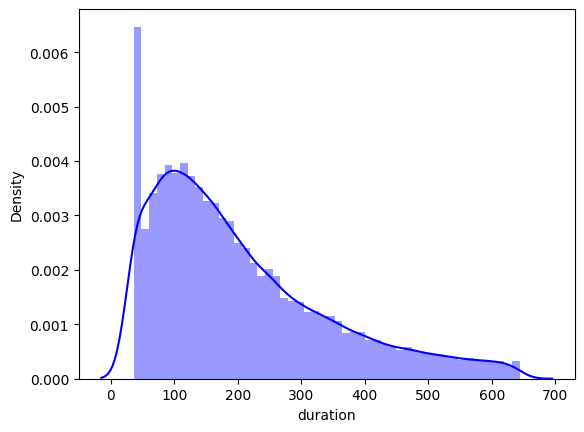

In [135]:
#Verificamos la distribución después de eliminar outliers
sns.distplot(df['duration'],color="blue")

In [136]:
# Crear boxplots para todas las variables numéricas en función del resultado del depósito

# Filtrar las variables numéricas
variables_numericas = df.select_dtypes(include='number').columns

# Crear boxplots para cada variable numérica
for variable in variables_numericas:
    fig_box = px.box(df, x='y', y=variable, title=f'Distribución de {variable} por Resultado de Depósito', color='y')
    fig_box.show()



Output hidden; open in https://colab.research.google.com to view.

## 6. Correlaciones entre Variables Numéricas

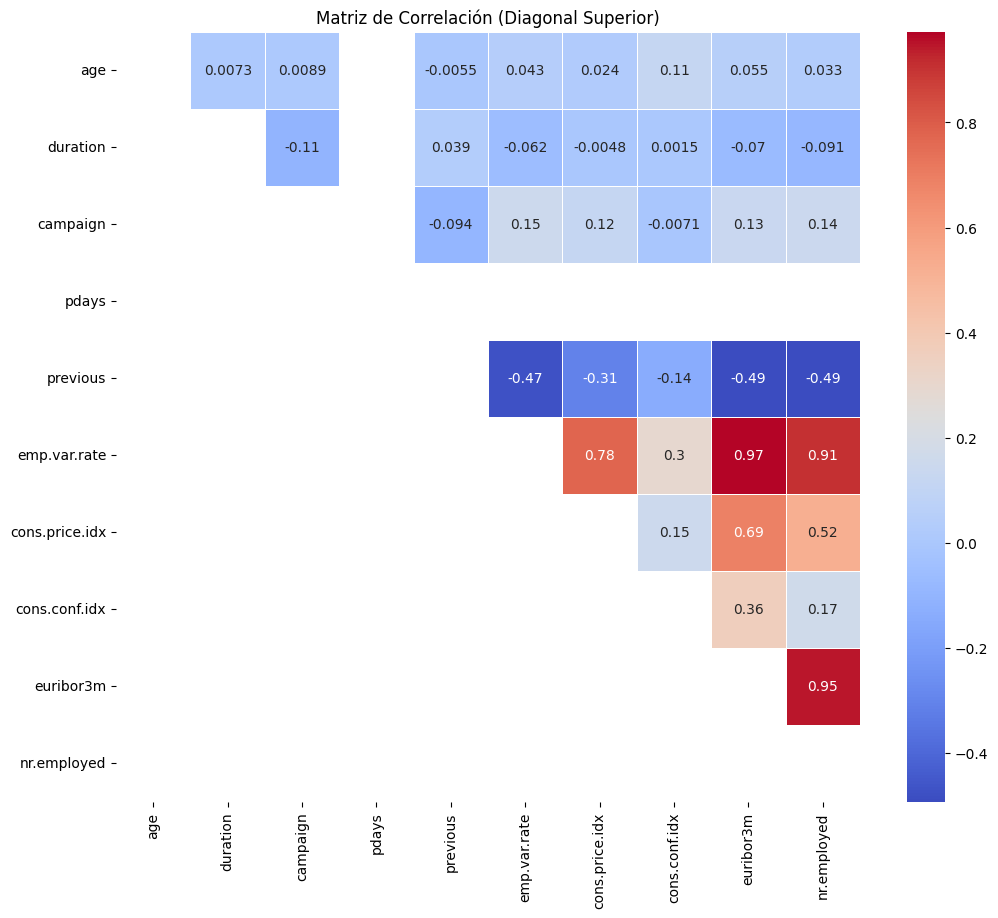

In [137]:
# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = df[variables_numericas].corr()
# Crear una copia de la matriz de correlación con solo la parte superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=~mask, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Matriz de Correlación (Diagonal Superior)')
plt.show()


## 7.Corrección de las Variables Independientes

In [138]:
from sklearn.preprocessing import LabelEncoder

In [139]:
df[var_cualitativas]=df[var_cualitativas].apply(LabelEncoder().fit_transform)

In [140]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,58,5,1,5,0,2,0,0,7,0,...,1,0,0,1,-1.1,94.767,-47.1,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,0,0,1,-1.1,94.767,-47.1,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,0,0,1,-1.1,94.767,-47.1,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,0,0,1,-1.1,94.767,-47.1,1.028,4963.6,1


In [141]:
# Definir las variables cualitativas y convertirlas a tipo 'category'
var_cualitativas = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Convertir las variables cualitativas a tipo 'category'
for column in var_cualitativas:
    df[column] = df[column].astype('category')

# Verificar las conversiones
df.dtypes

,0
age,int64
job,category
marital,category
education,category
default,category
housing,category
loan,category
contact,category
month,category
day_of_week,category


In [143]:
# Eliminar las columnas 'pdays' y 'y_numeric' del dataframe
df.drop(columns=['pdays'], inplace=True)

# Verificar que las columnas hayan sido eliminadas
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### 8. Grabe el primer modelo de regresión y otórguele el alias de su preferencia. Comente los resultados del modelo, por ejemplo:
- ¿Bajo cuántos datos fue obtenido el modelo?
- ¿Cuál es su grado de ajuste?,
- ¿Hay variables significativas?
- ¿Cuáles son las variables no- significativas? Para esta última pregunta por favor aplique un contraste de hipótesis sobre los estimadores

### 1. Regresión logística

In [144]:
X = df[df.columns.difference(['y'])]
y = df.y

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train_logit , X_test_logit , y_train_logit , y_test_logit = train_test_split(X , y , test_size = 0.20,random_state =123)

In [147]:
print(X_train_logit.shape,"",type(X_train_logit))
print(X_train_logit.shape,"\t ",type(y_train_logit))
print(X_test_logit.shape,"",type(X_test_logit))
print(X_test_logit.shape,"\t ",type(y_test_logit))

(30580, 19)  <class 'pandas.core.frame.DataFrame'>
(30580, 19) 	  <class 'pandas.core.series.Series'>
(7645, 19)  <class 'pandas.core.frame.DataFrame'>
(7645, 19) 	  <class 'pandas.core.series.Series'>


In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train_logit, y_train_logit)

LogisticRegression()

### Realizar las predicciones

In [150]:
predicciones_train_logit = modelo_logistico.predict(X_train_logit)
predicciones_test_logit  = modelo_logistico.predict(X_test_logit)

### Métricas de evaluación

In [151]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
# Imprimir el reporte de clasificación
print(classification_report(y_test_logit, predicciones_test_logit))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7048
           1       0.58      0.35      0.44       597

    accuracy                           0.93      7645
   macro avg       0.77      0.67      0.70      7645
weighted avg       0.92      0.93      0.92      7645



#### Accuracy

In [152]:
from sklearn.metrics import accuracy_score

In [153]:
# Imprimir la exactitud del modelo
print(f"Accuracy: {accuracy_score(y_test_logit, predicciones_test_logit):.2f}")

Accuracy: 0.93


#### Matriz de confusión

In [98]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score

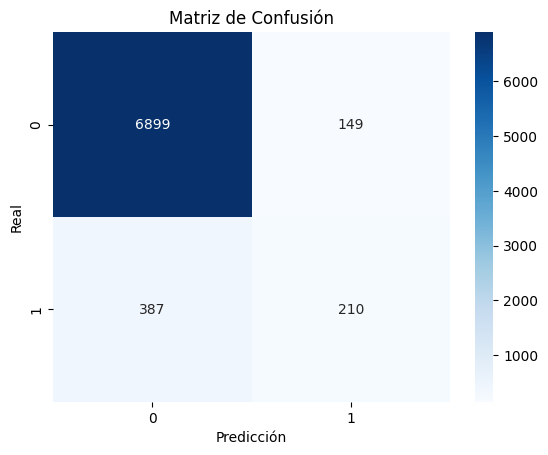

In [154]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test_logit, predicciones_test_logit)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

### Importancia de las variables

In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
sc_logit = StandardScaler()

In [160]:
X_train_std_logit = sc_logit.fit_transform(X_train_logit)
X_test_std_logit = sc_logit.transform(X_test_logit)

#### Entrenar el modelo con los datos de entrenamiento

In [161]:
modelo_logistico_std = LogisticRegression()
modelo_logistico_std.fit(X_train_std_logit, y_train_logit)

LogisticRegression()

Una vez tenemos nuestros diferentes conjuntos de datos, procedemos a entrenar al modelo:

#### Realizar las predicciones

In [162]:
predicciones_train_logit_std = modelo_logistico_std.predict(X_train_std_logit)
predicciones_test_logit_std  = modelo_logistico_std.predict(X_test_std_logit)

#### Extraer los coeficientes

In [165]:
# Importancia de las variables
feature_importance = abs(modelo_logistico_std.coef_[0])
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

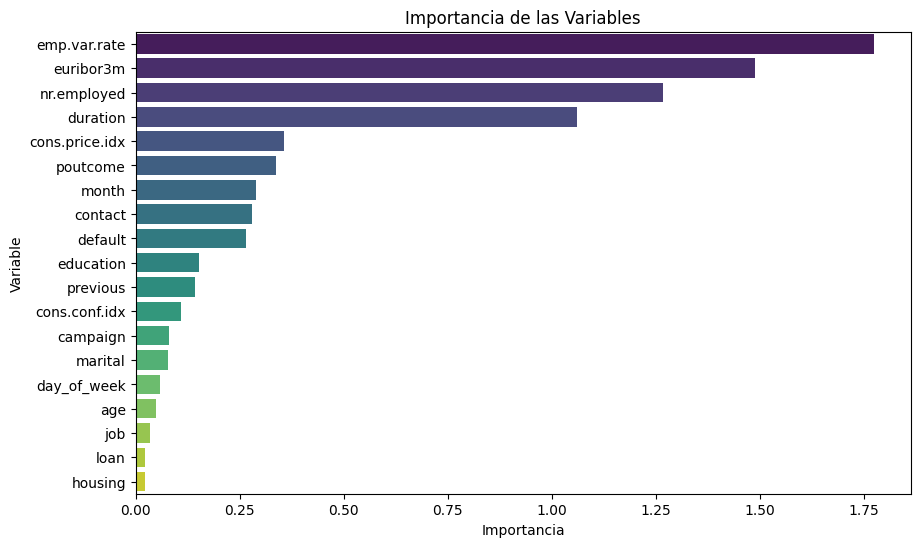

In [166]:
# Gráfico de importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Importancia de las Variables')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

### 2. SVM

In [167]:
# Importar las librerías necesarias
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [168]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_logit)
X_test_scaled = scaler.transform(X_test_logit)


In [170]:
# Crear el modelo SVM con un kernel RBF (puedes probar con otros kernels también)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
svm_model.fit(X_train_scaled, y_train_logit)

SVC(random_state=42)

In [171]:
# Realizar predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
print("Precisión del modelo SVM:", accuracy_score(y_test_logit, y_pred_svm))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test_logit, y_pred_svm))
print("\nReporte de Clasificación:")
print(classification_report(y_test_logit, y_pred_svm))

Precisión del modelo SVM: 0.9407455853499019

Matriz de Confusión:
[[6939  109]
 [ 344  253]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7048
           1       0.70      0.42      0.53       597

    accuracy                           0.94      7645
   macro avg       0.83      0.70      0.75      7645
weighted avg       0.93      0.94      0.93      7645



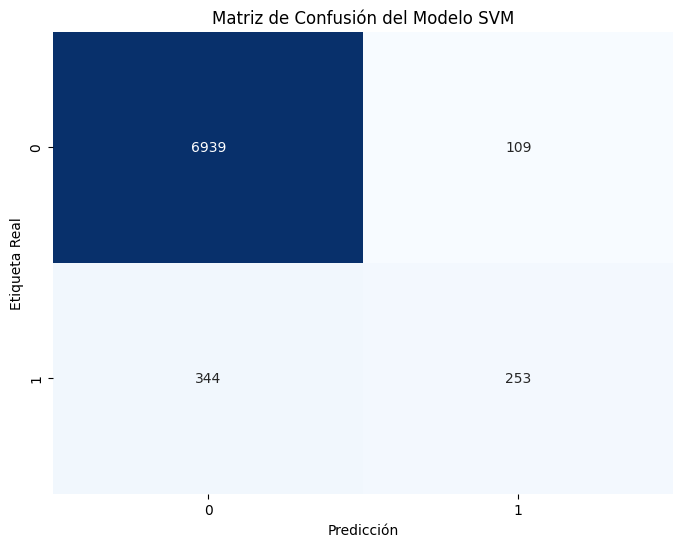

In [172]:
# Calcular la matriz de confusión
cm_svm = confusion_matrix(y_test_logit, y_pred_svm)

# Graficar la matriz de confusión para el modelo SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión del Modelo SVM')
plt.show()

### 3. Knn

In [173]:
# Importar las librerías necesarias
from sklearn.neighbors import KNeighborsClassifier

In [174]:
# Crear el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el valor de k según el rendimiento

# Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train_scaled, y_train_logit)

KNeighborsClassifier()

In [175]:
# Realizar predicciones en el conjunto de prueba
y_pred_knn = knn_model.predict(X_test_scaled)

In [176]:
# Evaluar el rendimiento del modelo
print("Precisión del modelo KNN:", accuracy_score(y_test_logit, y_pred_knn))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test_logit, y_pred_knn))
print("\nReporte de Clasificación:")
print(classification_report(y_test_logit, y_pred_knn))

Precisión del modelo KNN: 0.9315892740353172

Matriz de Confusión:
[[6880  168]
 [ 355  242]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7048
           1       0.59      0.41      0.48       597

    accuracy                           0.93      7645
   macro avg       0.77      0.69      0.72      7645
weighted avg       0.92      0.93      0.93      7645



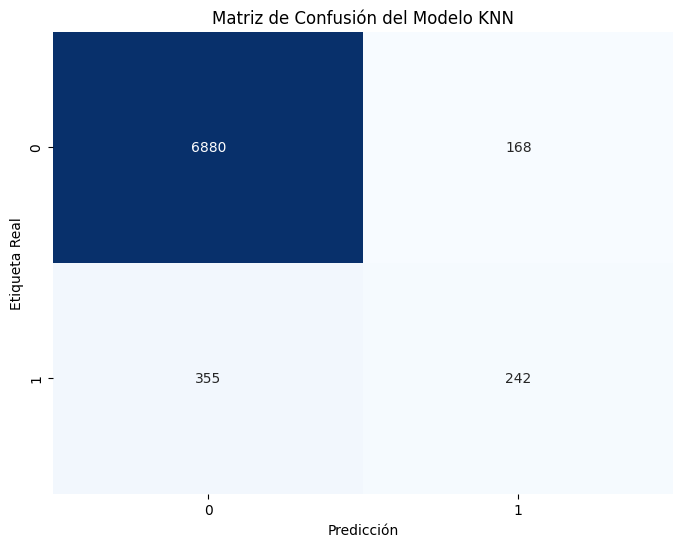

In [177]:
# Graficar la matriz de confusión para el modelo KNN
cm_knn = confusion_matrix(y_test_logit, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión del Modelo KNN')
plt.show()

## Optimizando n

In [178]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Lista de posibles valores de k
k_values = range(1, 21)

# Almacenar los resultados de precisión para cada valor de k
mean_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train_logit, cv=5, scoring='accuracy')
    mean_accuracy.append(scores.mean())


In [179]:
# Encontrar el valor óptimo de k con mayor precisión media
optimal_k = k_values[np.argmax(mean_accuracy)]
print(f"El mejor valor para k es: {optimal_k}")

El mejor valor para k es: 20


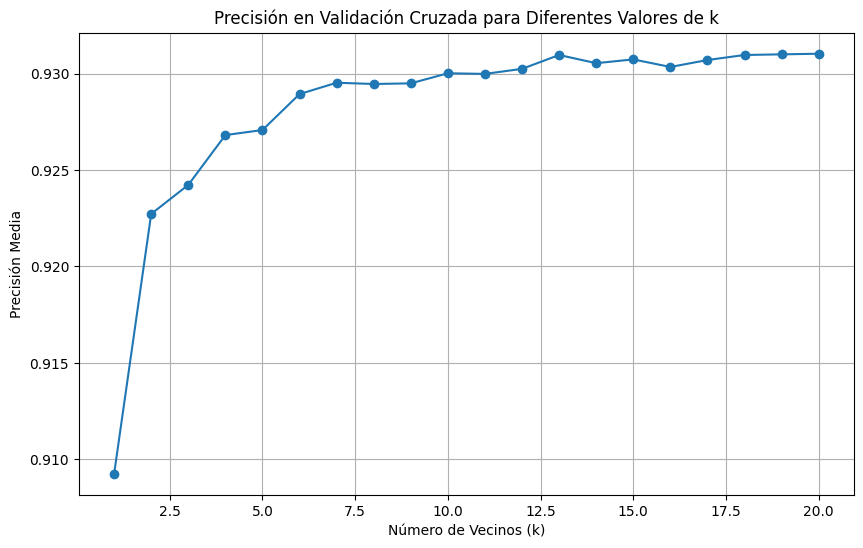

In [180]:
# Graficar la precisión media para cada valor de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracy, marker='o')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión Media')
plt.title('Precisión en Validación Cruzada para Diferentes Valores de k')
plt.grid(True)
plt.show()

In [181]:
# Crear el modelo KNN
knn_model_op = KNeighborsClassifier(n_neighbors=optimal_k)  # Puedes ajustar el valor de k según el rendimiento

# Entrenar el modelo con los datos de entrenamiento
knn_model_op.fit(X_train_scaled, y_train_logit)

KNeighborsClassifier(n_neighbors=20)

In [182]:
# Realizar predicciones en el conjunto de prueba
y_pred_knn_op = knn_model_op.predict(X_test_scaled)

In [183]:
# Evaluar el rendimiento del modelo
print("Precisión del modelo KNN:", accuracy_score(y_test_logit, y_pred_knn_op))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test_logit, y_pred_knn_op))
print("\nReporte de Clasificación:")
print(classification_report(y_test_logit, y_pred_knn_op))

Precisión del modelo KNN: 0.9360366252452583

Matriz de Confusión:
[[6964   84]
 [ 405  192]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7048
           1       0.70      0.32      0.44       597

    accuracy                           0.94      7645
   macro avg       0.82      0.65      0.70      7645
weighted avg       0.93      0.94      0.92      7645



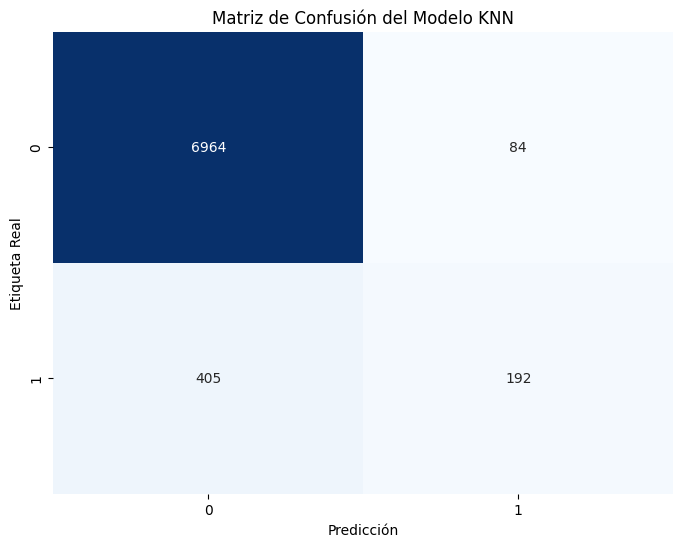

In [184]:
# Graficar la matriz de confusión para el modelo KNN
cm_knn = confusion_matrix(y_test_logit, y_pred_knn_op)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión del Modelo KNN')
plt.show()